In [ ]:
#IGNORE THE COMMENTED CODE

In [1]:
import qiskit_metal as qm

In [2]:
from qiskit_metal import designs, draw, MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.qubits.transmon_pocket_6 import TransmonPocket6
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
import numpy as np
from collections import OrderedDict

In [3]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

In [4]:
design.chips.main

{'material': 'silicon',
 'layer_start': '0',
 'layer_end': '2048',
 'size': {'center_x': '0.0mm',
  'center_y': '0.0mm',
  'center_z': '0.0mm',
  'size_x': '9mm',
  'size_y': '6mm',
  'size_z': '-750um',
  'sample_holder_top': '890um',
  'sample_holder_bottom': '1650um'}}

In [5]:
def ChipSize(x:str, y:str, cheese: bool = False, layer: int = 0):
    design.chips.main.size.size_x = x
    design.chips.main.size.size_y = y
    design.chips.default_settings['cheese'] = cheese
    design.chips.default_settings['layer_start'] = layer

In [6]:
ChipSize('11mm', '11mm', False, 0)

In [7]:
def guidraw(n=1, dlt=False, hlt=False):
    if dlt:
        gui.rebuild()
        gui.screenshot()
    else:
        gui.rebuild()
        gui.autoscale()
        all_component_names = design.components.keys()
        #if n==1:
            #gui.edit_component(['Q1'])
        gui.zoom_on_components(all_component_names)
        if hlt:
            all_component_names = design.components.keys()
            gui.highlight_components(all_component_names)
        gui.screenshot()

In [8]:
def clean():
    design.delete_all_components()

In [9]:
'''def QTreeN(n,a=6):
    qudict = Dict()
    offset = 125
    design.overwrite_enabled = True
    options = Dict(
        pad_width = '450um',
        pocket_width = '650um',
        connection_pads = Dict(
            ip = Dict(loc_W= +0, loc_H = -1, pad_width = '90um'),
            left = Dict(loc_W= -1, loc_H = +1, pad_width = '90um'),
            right = Dict(loc_W= +1, loc_H = +1, pad_width = '90um')
        ),
    layer = 0
    )
    for i in range(n):
        posX = 
        posY = 
        angle =
        qudict[f'q{i}'] = TransmonPocket6(design, f'Q{i}', options=Dict(pos_x=posX,pos_y=posY, orientation = angle, **options))
    #q2 = TransmonPocket6(design, 'Q2', options=Dict(pos_x= str(a/2)+'0mm',pos_y=offset, orientation = -90, **options))
    #q3 = TransmonPocket6(design, 'Q3', options=Dict(pos_x= str(-a/2)+'0mm',pos_y=offset, orientation = 90, **options))
    guidraw(n=n, hlt=True)'''

"def QTreeN(n,a=6):\n    qudict = Dict()\n    offset = 125\n    design.overwrite_enabled = True\n    options = Dict(\n        pad_width = '450um',\n        pocket_width = '650um',\n        connection_pads = Dict(\n            ip = Dict(loc_W= +0, loc_H = -1, pad_width = '90um'),\n            left = Dict(loc_W= -1, loc_H = +1, pad_width = '90um'),\n            right = Dict(loc_W= +1, loc_H = +1, pad_width = '90um')\n        ),\n    layer = 0\n    )\n    for i in range(n):\n        posX = \n        posY = \n        angle =\n        qudict[f'q{i}'] = TransmonPocket6(design, f'Q{i}', options=Dict(pos_x=posX,pos_y=posY, orientation = angle, **options))\n    #q2 = TransmonPocket6(design, 'Q2', options=Dict(pos_x= str(a/2)+'0mm',pos_y=offset, orientation = -90, **options))\n    #q3 = TransmonPocket6(design, 'Q3', options=Dict(pos_x= str(-a/2)+'0mm',pos_y=offset, orientation = 90, **options))\n    guidraw(n=n, hlt=True)"

In [12]:
'''def connections(total_length:str, com1:str, pin1:str, com2: str, pin2: str, st_st:str, end_st: str, asym):
    ops = Dict(fillet = '99.99um')
    myopts= Dict(
        total_length = total_length,
        hfss_wire_bonds = True,
        pin_inputs = Dict(
            start_pin = Dict(
                component = com1,
                pin = pin1
            ),
            end_pin = Dict(
                component = com2,
                pin = pin2
            )
        ),
        lead = Dict(
            start_straight = st_st,
            end_straight = end_st
        ),
        meander = Dict(
            #spacing = spacing,
            asymmetry = asym
        ),
        layer = 0,
        **ops
    )

    try: 
        cpw.delete()
    except NameError: pass

    cpw = RouteMeander(design, options=myopts)'''

"def connections(total_length:str, com1:str, pin1:str, com2: str, pin2: str, st_st:str, end_st: str, asym):\n    ops = Dict(fillet = '99.99um')\n    myopts= Dict(\n        total_length = total_length,\n        hfss_wire_bonds = True,\n        pin_inputs = Dict(\n            start_pin = Dict(\n                component = com1,\n                pin = pin1\n            ),\n            end_pin = Dict(\n                component = com2,\n                pin = pin2\n            )\n        ),\n        lead = Dict(\n            start_straight = st_st,\n            end_straight = end_st\n        ),\n        meander = Dict(\n            #spacing = spacing,\n            asymmetry = asym\n        ),\n        layer = 0,\n        **ops\n    )\n\n    try: \n        cpw.delete()\n    except NameError: pass\n\n    cpw = RouteMeander(design, options=myopts)"

In [34]:
def rudimentree(n):
    a=6
    k = 0.5
    offset = 0.125
    design.overwrite_enabled = True
    options = Dict(
        pad_width = '450um',
        pocket_width = '650um',
        connection_pads = Dict(
            ip = Dict(loc_W= +0, loc_H = -1, pad_width = '90um'),
            left = Dict(loc_W= -1, loc_H = +1, pad_width = '90um'),
            right = Dict(loc_W= +1, loc_H = +1, pad_width = '90um')
        ),
        layer = 0
    )
    if n>=1:
        q1 = TransmonPocket6(design, 'Q1', options=Dict(pos_x='+0.00mm',pos_y='0mm', orientation = 0, **options))

    if n>=2:
    #first branch
        q2 = TransmonPocket6(design, 'Q2', options=Dict(pos_x= str(k*a)+'0mm',pos_y= str(offset) + 'mm', orientation = -90, **options))
    if n>=3:
        q3 = TransmonPocket6(design, 'Q3', options=Dict(pos_x= str(-k*a)+'0mm',pos_y= str(offset) + 'mm', orientation = 90, **options))
    #second branch
    if n>=4:
        q4 = TransmonPocket6(design, 'Q4', options=Dict(pos_x= str(-k*a-offset)+'0mm',pos_y=str(k**2*a+offset) + '0mm', orientation = 0, **options))
    if n>=5:
        q5 = TransmonPocket6(design, 'Q5', options=Dict(pos_x= str(k*a+offset)+'0mm',pos_y=str(k**2*a+offset) + '0mm', orientation = 0, **options))
    if n>=6:
        q6 = TransmonPocket6(design, 'Q6', options=Dict(pos_x= str(-k*a-offset)+'0mm',pos_y=str(-k**2*a-offset) + '0mm', orientation = 90*2, **options))
    if n>=7:
        q7 = TransmonPocket6(design, 'Q7', options=Dict(pos_x= str(k*a+offset)+'0mm',pos_y=str(-k**2*a-offset) + '0mm', orientation = 90*2, **options))
    guidraw(n=7, hlt=True)

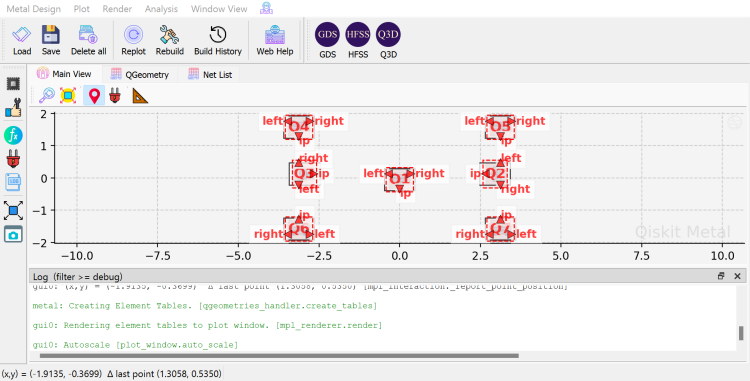

In [39]:
rudimentree(n=7)

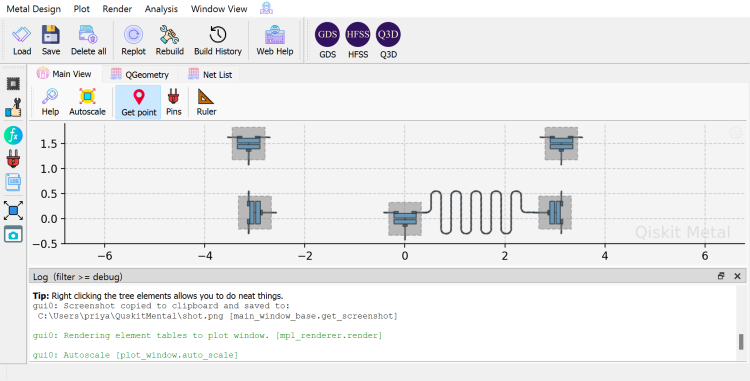

In [16]:
'''jogsS = OrderedDict()
jogsE = OrderedDict()
ops = Dict(fillet = '90um')

jogl = '200um'  
for i in range(10):
    if i==0:
        jogsS[i] = ['L', jogl]
    elif i%4==1:
        jogsS[i] = ['L', jogl]
        jogsS[i+1] = ['R', jogl]
    elif i%4==3:
        jogsS[i] = ['R', jogl]
        jogsS[i+1] = ['L', jogl]

for i in range(10):
    if i==0:
        jogsE[i] = ['R', jogl]
    elif i%4==1:
        jogsE[i] = ['R', jogl]
        jogsE[i+1] = ['L', jogl]
    elif i%4==3:
        jogsE[i] = ['L', jogl]
        jogsE[i+1] = ['R', jogl]
        
options = Dict(
    total_length = '9mm',
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q1',
            pin = 'right'
        ),
        end_pin = Dict(
            component = 'Q2',
            pin = 'ip'
        )
    ),
    lead = Dict(
        start_straight = '0.1mm',
        end_straight = '0.0mm',
        #start_jogged_extension = jogsS,
        #end_jogged_extension = jogsE
    ),
    meander = Dict(
        spacing = '200um',
        asymmetry = '-0.5um'
    ),
    layer = 0,
    **ops
)

try:
    cpw23.delete()
except NameError: pass

cpw23  = RouteMeander(design, options=options)

guidraw(n=3)'''

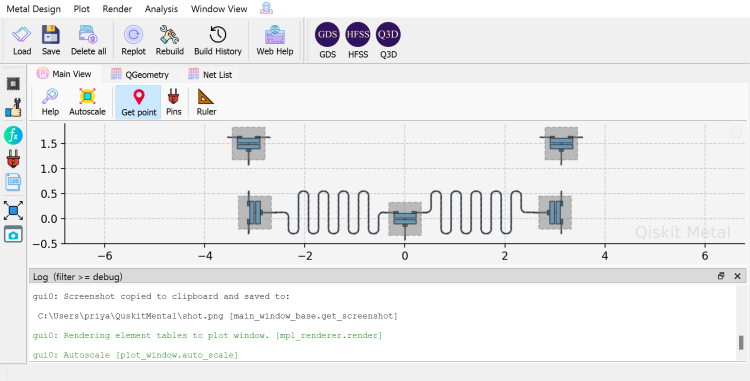

In [17]:
'''jogsS = OrderedDict()
jogsE = OrderedDict()
ops = Dict(fillet = '90um')

jogl = '200um'  
for i in range(10):
    if i==0:
        jogsS[i] = ['L', jogl]
    elif i%4==1:
        jogsS[i] = ['L', jogl]
        jogsS[i+1] = ['R', jogl]
    elif i%4==3:
        jogsS[i] = ['R', jogl]
        jogsS[i+1] = ['L', jogl]

for i in range(10):
    if i==0:
        jogsE[i] = ['R', jogl]
    elif i%4==1:
        jogsE[i] = ['R', jogl]
        jogsE[i+1] = ['L', jogl]
    elif i%4==3:
        jogsE[i] = ['L', jogl]
        jogsE[i+1] = ['R', jogl]


options = Dict(
    total_length = '9mm',
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q1',
            pin = 'left'
        ),
        end_pin = Dict(
            component = 'Q3',
            pin = 'ip'
        )
    ),
    lead = Dict(
        start_straight = '0.1mm',
        end_straight = '0.0mm',
        #start_jogged_extension = jogsS,
        #end_jogged_extension = jogsE
    ),
    meander = Dict(
        spacing = '200um',
        asymmetry = '+0.5um'
    ),
    layer = 0,
    **ops
)

try:
    cpw13.delete()
except NameError: pass

cpw13 = RouteMeander(design, options=options)

guidraw(n=3)'''

12:49AM 42s WARNING [__init__]: Component Q6 does not exist. None has not been built. Please check your pin_input values.


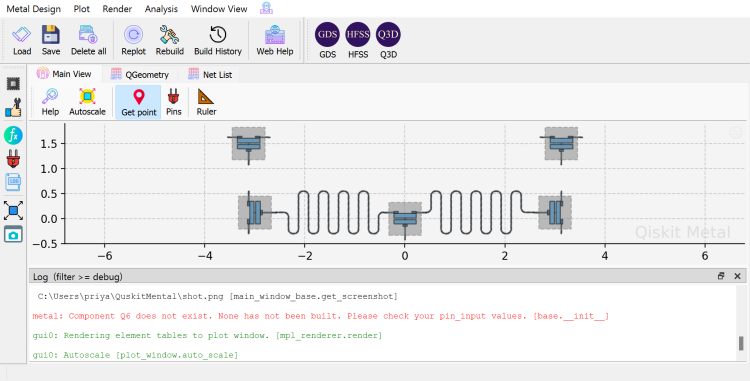

In [18]:
'''options = Dict(
    total_length = '3mm',
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q2',
            pin = 'left'
        ),
        end_pin = Dict(
            component = 'Q6',
            pin = 'ip'
        )
    ),
    lead = Dict(
        start_straight = '0.1mm',
        end_straight = '0.0mm',
        #start_jogged_extension = jogsS,
        #end_jogged_extension = jogsE
    ),
    meander = Dict(
        spacing = '200um',
        asymmetry = '+0.5um'
    ),
    layer = 0,
    **ops
)

try:
    cpw33.delete()
except NameError: pass

cpw33 = RoutePathfinder(design, options=options)

guidraw(n=3)'''

In [58]:
def rudimentconn(n):
    ops = Dict(fillet = '90um')
    if n>=2:
        options = Dict(
            total_length = '6mm',
            pin_inputs = Dict(
                start_pin = Dict(
                    component = 'Q1',
                    pin = 'right'
                ),
                end_pin = Dict(
                    component = 'Q2',
                    pin = 'ip'
                )
            ),
            lead = Dict(
                start_straight = '0.1mm',
                end_straight = '0.0mm',
                #start_jogged_extension = jogsS,
                #end_jogged_extension = jogsE
            ),
            meander = Dict(
                spacing = '200um',
                asymmetry = '+0.5um'
            ),
            layer = 0,
            **ops
        )
        try:
            cpw12.delete()
        except NameError: pass
        cpw12  = RouteMeander(design, options=options)
    
    if n>=3:
        options = Dict(
            total_length = '6mm',
            pin_inputs = Dict(
                start_pin = Dict(
                    component = 'Q1',
                    pin = 'left'
                ),
                end_pin = Dict(
                    component = 'Q3',
                    pin = 'ip'
                )
            ),
            lead = Dict(
                start_straight = '0.1mm',
                end_straight = '0.0mm',
                #start_jogged_extension = jogsS,
                #end_jogged_extension = jogsE
            ),
            meander = Dict(
                spacing = '200um',
                asymmetry = '-0.5um'
            ),
            layer = 0,
            **ops
        )
        try:
            cpw13.delete()
        except NameError: pass
        cpw13  = RouteMeander(design, options=options)
        
    if n>=4:
        options = Dict(
            total_length = '3mm',
            pin_inputs = Dict(
                start_pin = Dict(
                    component = 'Q2',
                    pin = 'left'
                ),
                end_pin = Dict(
                    component = 'Q5',
                    pin = 'ip'
                )
            ),
            lead = Dict(
                start_straight = '0.1mm',
                end_straight = '0.0mm',
                #start_jogged_extension = jogsS,
                #end_jogged_extension = jogsE
            ),
            meander = Dict(
                spacing = '200um',
                asymmetry = '-0.5um'
            ),
            layer = 0,
            **ops
        )
        try:
            cpw25.delete()
        except NameError: pass
        cpw25  = RouteMeander(design, options=options)
    if n>=5:
        options = Dict(
            total_length = '3mm',
            pin_inputs = Dict(
                start_pin = Dict(
                    component = 'Q3',
                    pin = 'right'
                ),
                end_pin = Dict(
                    component = 'Q4',
                    pin = 'ip'
                )
            ),
            lead = Dict(
                start_straight = '0.1mm',
                end_straight = '0.0mm',
                #start_jogged_extension = jogsS,
                #end_jogged_extension = jogsE
            ),
            meander = Dict(
                spacing = '200um',
                asymmetry = '-0.5um'
            ),
            layer = 0,
            **ops
        )
        try:
            cpw34.delete()
        except NameError: pass
        cpw34  = RouteMeander(design, options=options)
    
    if n>=6:
        options = Dict(
            total_length = '3mm',
            pin_inputs = Dict(
                start_pin = Dict(
                    component = 'Q3',
                    pin = 'left'
                ),
                end_pin = Dict(
                    component = 'Q6',
                    pin = 'ip'
                )
            ),
            lead = Dict(
                start_straight = '0.1mm',
                end_straight = '0.0mm',
                #start_jogged_extension = jogsS,
                #end_jogged_extension = jogsE
            ),
            meander = Dict(
                spacing = '200um',
                asymmetry = '+0.5um'
            ),
            layer = 0,
            **ops
        )
        try:
            cpw27.delete()
        except NameError: pass
        cpw27  = RouteMeander(design, options=options)
    
    if n>=7:
        options = Dict(
            total_length = '3mm',
            pin_inputs = Dict(
                start_pin = Dict(
                    component = 'Q2',
                    pin = 'right'
                ),
                end_pin = Dict(
                    component = 'Q7',
                    pin = 'ip'
                )
            ),
            lead = Dict(
                start_straight = '0.1mm',
                end_straight = '0.0mm',
                #start_jogged_extension = jogsS,
                #end_jogged_extension = jogsE
            ),
            meander = Dict(
                spacing = '200um',
                asymmetry = '+0.5um'
            ),
            layer = 0,
            **ops
        )
        try:
            cpw36.delete()
        except NameError: pass
        cpw36  = RouteMeander(design, options=options)
    guidraw(n=3)

In [59]:
clean()

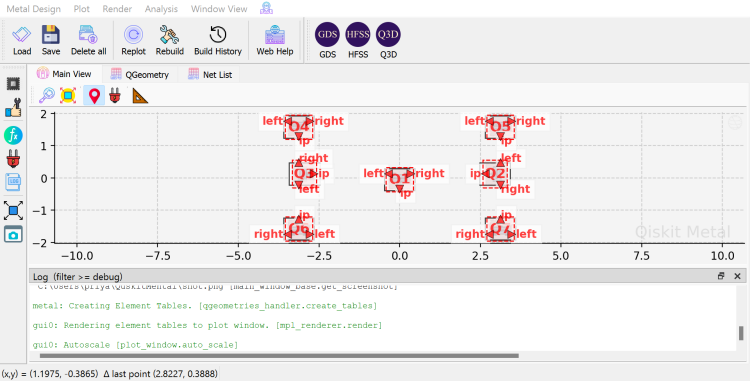

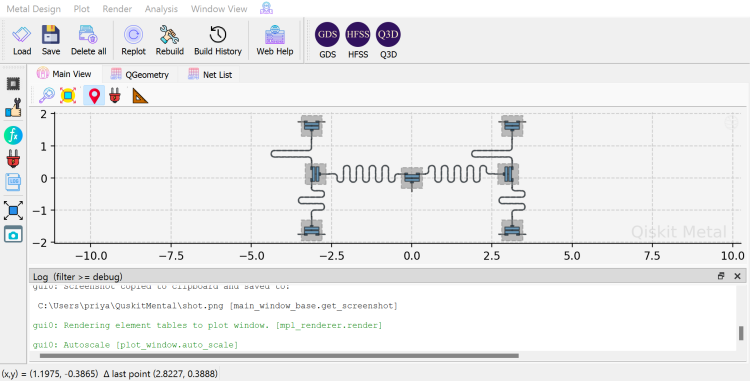

In [60]:
n=7
rudimentree(n)
rudimentconn(n)